<a href="https://colab.research.google.com/github/Nardy07/major-proj-final/blob/main/lstcopybin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn.calibration import LabelEncoder
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential,save_model
from keras.layers import LSTM, Dense, Dropout,Embedding, SpatialDropout1D,BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

In [2]:
X = pd.read_csv('X_balanced_bin.csv')
y = pd.read_csv('Y_balanced_bin.csv')

In [3]:
X

,Src_Port,Bwd_IAT_Tot,Bwd_IAT_Mean,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Init_Bwd_Win_Byts
0,40539,5585.0,2792.5000,362,172.400000,167.656792,2.810880e+04,215.500000,50.000000,-1
1,52016,30200000.0,150116.9851,11700,2069.623853,2384.247148,5.684634e+06,2075.972393,15.024194,64240
2,443,0.0,0.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,64240
3,0,19.0,19.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1
4,0,32.0,32.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1
...,...,...,...,...,...,...,...,...,...,...
136843,47283,20.0,20.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0
136844,80,64953.0,10825.5000,30,5.454545,12.135598,1.472727e+02,6.000000,10.000000,63
136845,0,17.0,17.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1
136846,80,9283.0,9283.0000,0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,63


In [4]:
y

,Label
0,Normal
1,Normal
2,Normal
3,Abnormal
4,Abnormal
...,...
136843,Abnormal
136844,Abnormal
136845,Abnormal
136846,Abnormal


In [5]:
# Define the maximum sequence length and vocabulary size
maxlen = 10  # or any appropriate value
max_features = 300  # or any appropriate value

In [6]:
# Define the embedding dimension
embed_dim = 128

In [7]:
normalisation_layer = BatchNormalization()

In [8]:
#model = Sequential()
#model.add(Embedding(max_features, output_dim=embed_dim, input_length=maxlen, trainable=True))
#model.add(SpatialDropout1D(0.2))
#model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
#model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))
#model.add(Dense(units = 32 , activation = 'relu'))
#model.add(Dense(3, activation='softmax'))
#model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])



model = Sequential()
model.add(normalisation_layer)
#model.add(Embedding(max_features, output_dim=embed_dim, input_length=maxlen, trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.2 , dropout = 0.2))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [166]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [9]:
y = y['Label'].values
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
#converting labels to one hot encoded format
#num_classes = 2
#y = to_categorical(y)

In [12]:
scaler = MinMaxScaler()
X = X.values
X = scaler.fit_transform(X)

In [13]:
#def handle_negative_values(data):
 # scaled_data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
  #transformed_data = 1/(1+np.exp(-scaled_data))

  #return transformed_data
#transformed_data=handle_negative_values(X)
#X = transformed_data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [15]:
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)


(109478,)
(27370,)
(109478, 10)
(27370, 10)


In [16]:
X_train = X_train.reshape((X_train.shape[0],1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0],1, X_test.shape[1]))
##scaler = StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test  = scaler.transform(X_test)

In [19]:
batch_size = 32
epochs = 50

In [150]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
history = model.fit(X_train, y_train, batch_size = batch_size , validation_data = (X_test,y_test) , epochs = epochs)

Epoch 1/50
3422/3422 [==============================] - 16s 5ms/step - loss: 0.1246 - accuracy: 0.9579 - val_loss: 0.0615 - val_accuracy: 0.9903
Epoch 2/50
3422/3422 [==============================] - 17s 5ms/step - loss: 0.1258 - accuracy: 0.9576 - val_loss: 0.0496 - val_accuracy: 0.9901
Epoch 3/50
3422/3422 [==============================] - 16s 5ms/step - loss: 0.1264 - accuracy: 0.9569 - val_loss: 0.0499 - val_accuracy: 0.9898
Epoch 4/50
3422/3422 [==============================] - 17s 5ms/step - loss: 0.1260 - accuracy: 0.9575 - val_loss: 0.0521 - val_accuracy: 0.9902
Epoch 5/50
 378/3422 [==>...........................] - ETA: 12s - loss: 0.1243 - accuracy: 0.9567

In [92]:
print("Accuracy of the model on Training Data is - " , model.evaluate(X_train,y_train)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

3422/3422 [==============================] - 5s 1ms/step - loss: 0.0408 - accuracy: 0.9910
Accuracy of the model on Training Data is -  99.09753799438477 %
856/856 [==============================] - 1s 1ms/step - loss: 0.0373 - accuracy: 0.9921
Accuracy of the model on Testing Data is -  99.20716285705566 %


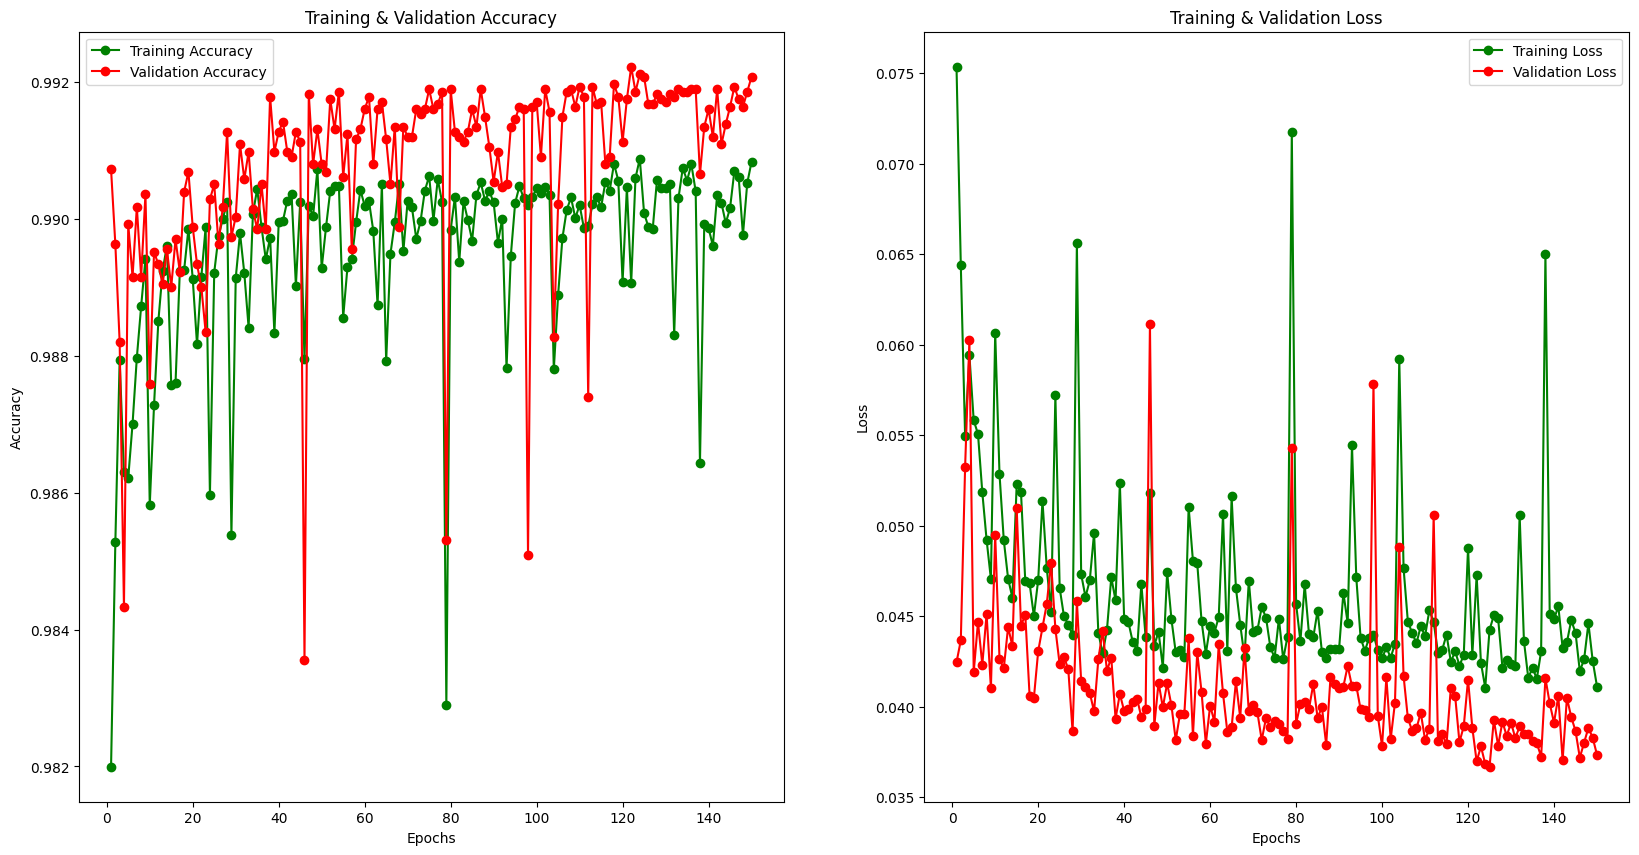

In [93]:
import matplotlib.pyplot as plt
epochs = [i for i in range(1,151)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Validation Loss')
ax[1].set_title('Training & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

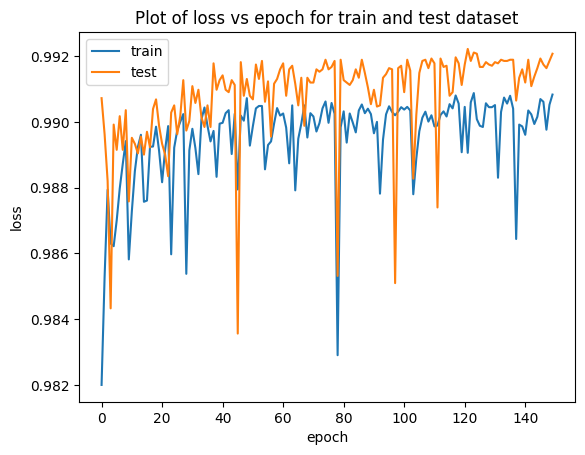

In [95]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
#plt.savefig('lstm_binary_loss.png')
plt.show()

In [71]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

856/856 [==============================] - 2s 1ms/step


In [72]:
y_pred

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13685
           1       1.00      0.98      0.99     13685

    accuracy                           0.99     27370
   macro avg       0.99      0.99      0.99     27370
weighted avg       0.99      0.99      0.99     27370



In [42]:
y_true_encoded = le.fit_transform(y_test)

In [43]:
y_pred_labels = le.fit_transform(y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [45]:
confusion_mat

array([[13685,     0],
       [  311, 13374]])

In [46]:
logr_bin_df = pd.DataFrame({'Actual': y_true_encoded, 'Predicted': y_pred_labels})
print(logr_bin_df)

       Actual  Predicted
0           1          1
1           1          1
2           0          0
3           1          1
4           1          1
...       ...        ...
27365       0          0
27366       0          0
27367       0          0
27368       1          1
27369       0          0

[27370 rows x 2 columns]


In [47]:
from keras.models import save_model

# Assuming 'model' is your trained Keras model
model.save('binbalancedModel.keras')  # Save the model in HDF5 format

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
